In [281]:
import pandas as pd

In [282]:
import joblib

In [283]:
import numpy as np

In [284]:
import seaborn

In [285]:
import matplotlib.pyplot as plt

In [286]:
import sklearn

In [287]:
from collections import Counter

In [288]:
import sys
additional_paths = ['/Users/rubber/SpeedyCommentExtractor', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '/Users/rubber/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages']
for p in additional_paths:
    sys.path.append(p)

In [289]:
%matplotlib inline 

In [290]:
data = pd.read_csv('full13.csv')
print("rows:", data.shape[0] - 1)
split = False

rows: 1181


In [291]:
data

,commentid,original_comment,label,line,language,new_line,location,length,source,trigram
0,1,Simple end list indicator for cases when we wa...,"hedonism, conformity","['simpl', 'end', 'list', 'indic', 'case', 'wan...",xml,simpl end list indic case want make sure fab c...,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,12,wordpress,"[('simpl', 'end', 'list'), ('end', 'list', 'in..."
1,2,Wraps the compat and OS versions of the Notifi...,hedonism,"['wrap', 'compat', 'os', 'version', 'notif', '...",kotlin,wrap compat os version notif build er easili a...,/tmp/tmpdk05w3ez/app/src/main/java/org/thought...,29,signal,"[('wrap', 'compat', 'os'), ('compat', 'os', 'v..."
2,3,TODO investigate if this false cause any issues!,security,"['todo', 'investig', 'fals', 'caus', 'issu']",java,todo investig fals caus issu,/tmp/tmpsxsprcp1/OsmAnd/src/net/osmand/plus/ac...,5,osmand,"[('todo', 'investig', 'fals'), ('investig', 'f..."
3,4,ProfileEditNameFragment Removed by excludeNonT...,security,"['profil', 'editnam', 'fragment', 'remov', 'ex...",xml,profil editnam fragment remov exclud nontransl...,/tmp/tmp7qfv_owk/app/src/main/res/values-tl/st...,20,osmand,"[('profileeditnamefrag', 'remov', 'excludenont..."
4,5,"We have no idea why, so we're just catching it...","self-direction, security","['idea', 'catch', 'mark', 'messag', 'failur', ...",java,idea catch mark messag failur way least repeat...,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,24,signal,"[('note', '110414', 'there'), ('110414', 'ther..."
...,...,...,...,...,...,...,...,...,...,...
1177,1178,"Google doesn't publish checksums. Why, Google,...",none,"['googl', 'publish', 'check', 'sum', 'googl']",xml,googl publish check sum googl,/Users/rubber/fenix/taskcluster/scripts/toolch...,4,firefox,"[('google', 'publish', 'checksums'), ('publish..."
1178,1179,Test running on betarelease builds in CI: caut...,conformity,"['test', 'run', 'beta', 'releas', 'build', 'ci...",kotlin,test run beta releas build ci caution make cha...,/Users/rubber/fenix/app/src/androidTest/java/o...,13,firefox,"[('test', 'running', 'betarelease'), ('running..."
1179,1180,"This is just a super secret crash button, so i...",none,"['super', 'secret', 'crash', 'button', 'interf...",xml,super secret crash button interfer real element,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,8,wordpress,"[('super', 'secret', 'crash'), ('secret', 'cra..."
1180,1181,"get children for this comment, set their level...",none,"['get', 'child', 'ren', 'comment', 'set', 'lev...",kotlin,get child ren comment set level add parent,/var/folders/0z/w9k_bhsd1pv7yblndck71ync0000gn...,7,wordpress,"[('get', 'children', 'comment'), ('children', ..."


In [292]:
labels = set()

tmp = data['label'].apply(lambda x: x.split(', '))
for label in tmp:
    labels = labels.union(label)
    
labels

{'achievement',
 'benevolence',
 'conformity',
 'hedonism',
 'none',
 'power',
 'security',
 'self-direction',
 'stimulation',
 'universalism'}

LABELS:
-----------------
[116, 116, 72, 13, 45, 81, 2, 148, 607, 33]
{'security', 'conformity', 'benevolence', 'achievement', 'hedonism', 'self-direction', 'stimulation', 'universalism', 'none', 'power'}


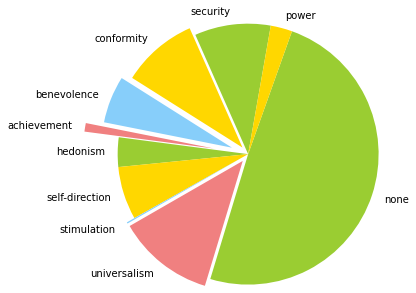

In [293]:
arr = []
print("LABELS:", end="\n-----------------\n")

labels_counter = {}

for label in labels:
    labels_counter[label] = 0

for data_labels in tmp:
    for label in labels:
        for data_label in data_labels:
            if data_label == label:
                labels_counter[label] += 1
            
arr = []

for label_name, frequency in labels_counter.items():
    arr.append(frequency)

print((arr))
print(labels)
    
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0,0.1,0.2,0.4,0,0,0.1,.1,0,0)
plt.pie(arr, labels=labels, radius=1.5, colors=colors, explode=explode, shadow=False, startangle=80)
plt.savefig('label_distribution.jpg', dpi=1000, bbox_inches='tight', pad_inches=.1)

In [294]:
print(Counter(data['source']))

Counter({'firefox': 503, 'osmand': 222, 'signal': 152, 'wordpress': 139, 'cgeo': 58, 'fbreader': 50, 'termux': 31, 'k-9': 18, 'duckduckgo': 6, 'bitcoin-wallet': 3})


In [295]:
split = False or split

if split == False:
    data['label'] = data['label'].apply(lambda x: x.split(', '))
    #data['label'] = data['label'].apply(lambda x: [] if ['none'] == x else x)
    data['label'] = data['label'].apply(lambda x: np.array(x))
    split = True

In [296]:
data['label']

0           [hedonism, conformity]
1                       [hedonism]
2                       [security]
3                       [security]
4       [self-direction, security]
                   ...            
1177                        [none]
1178                  [conformity]
1179                        [none]
1180                        [none]
1181                        [none]
Name: label, Length: 1182, dtype: object

# Missing data

commentid           0.0
original_comment    0.0
label               0.0
line                0.0
language            0.0
new_line            0.0
location            0.0
length              0.0
source              0.0
trigram             0.0
dtype: float64


<AxesSubplot:>

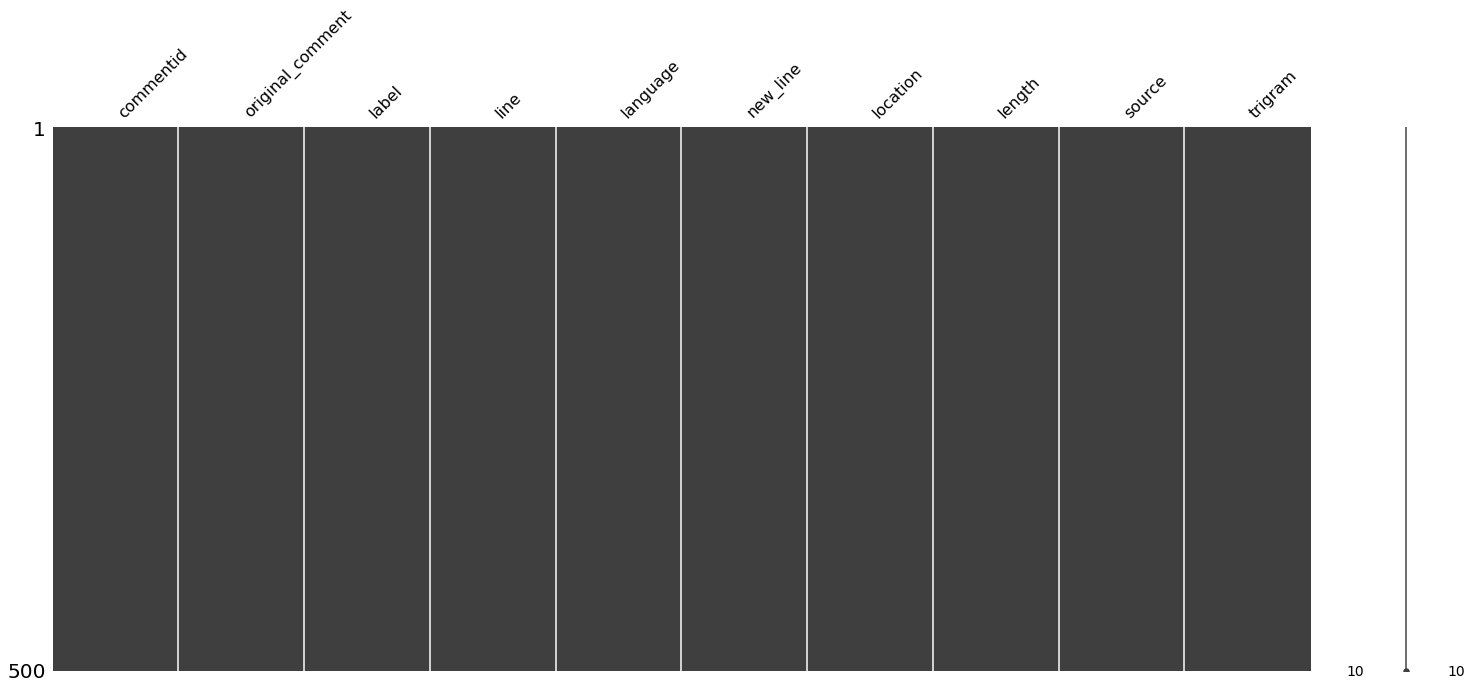

In [297]:
import missingno as msno
mean_missing_data = data.isnull().mean() * 100
print(mean_missing_data)
msno.matrix(data.sample(500))

# Splitting dataset

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import math
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTEN, RandomOverSampler, SMOTE

number_of_samples = min(data.shape[0], 1000000)

data.drop(columns="location")
data.drop(columns="commentid")

X_train, X_test, y_train, y_test = train_test_split(data[0:number_of_samples],
                                                    data['label'][0:number_of_samples],
                                                    random_state=1, shuffle=False)
print("length of training set", end=": ")                                                   
print(round(100*len(X_train)/len(data))/100)
print("length of testing set", end=": ")                                                   
print(round(100*len(X_test)/len(data))/100)
col_to_incl = ['new_line', 'language']
X_train = X_train[col_to_incl]
X_test = X_test[col_to_incl]

length of training set: 0.75
length of testing set: 0.25


In [299]:
# Oversample

In [300]:
from itertools import chain
from math import nan

def find_denom(li, v_count):
    try:
        res = sum(map(v_count.get, li)) / (len(li))
        #print(res)
        return res
    except:
        return nan


def oversample(x, y, len_mult=2, random_state=0) -> pd.DataFrame:
    df = pd.DataFrame()
    #print(y)
    df['y'] = y
    df['language'] = x['language']
    df['new_line'] = x['new_line']
    value_counts = Counter(chain(*df['y'].dropna()))
    #print(value_counts)
    denom = df['y'].map(lambda li: find_denom(li, value_counts), na_action='ignore')
    weights = 1 / (denom)
    weights.fillna(weights.sum() / weights.count(), inplace=True)
    #print(weights)
    extra_df = df.sample(
        len(df) * (len_mult-1), replace=True, weights=weights, random_state=random_state
    )
    df = pd.concat([df, extra_df])
    
    res_y = df['y']
    res_x = df[['new_line', 'language']]
    return res_x, res_y



In [301]:
oversampled_x_train, oversampled_y_train = oversample(X_train, y_train)

In [302]:
Counter(chain(*y_train))

Counter({'hedonism': 36,
         'conformity': 89,
         'security': 95,
         'self-direction': 71,
         'universalism': 118,
         'none': 426,
         'benevolence': 57,
         'power': 25,
         'achievement': 10,
         'stimulation': 2})

In [303]:
y_train

0          [hedonism, conformity]
1                      [hedonism]
2                      [security]
3                      [security]
4      [self-direction, security]
                  ...            
881                        [none]
882              [self-direction]
883                [universalism]
884                    [security]
885                        [none]
Name: label, Length: 886, dtype: object

In [304]:
Counter(chain(*oversampled_y_train))

Counter({'hedonism': 132,
         'conformity': 179,
         'security': 187,
         'self-direction': 180,
         'universalism': 227,
         'none': 499,
         'benevolence': 149,
         'power': 113,
         'achievement': 91,
         'stimulation': 117})

# Vectorisation

In [305]:
http_response_status_codes = np.linspace(100, 599, 500)
def process_out_noise(input):
    max_word_length = 18
    output = re.sub(r'\d+', '', input)
    w = re.findall(r'\w+', output)
    res = ""
    
    for word in w:
        if len(word) <= max_word_length:
            res += " " + word
    
    if output != '' and len(output) <= max_word_length:
        return output
    return res
    

In [306]:
X_train

,new_line,language
0,simpl end list indic case want make sure fab c...,xml
1,wrap compat os version notif build er easili a...,kotlin
2,todo investig fals caus issu,java
3,profil editnam fragment remov exclud nontransl...,xml
4,idea catch mark messag failur way least repeat...,java
...,...,...
881,recent tab header text jump back recent tab ho...,xml
882,todo chrisn see work around java io reader rea...,java
883,number tri local builder instead avail api num...,java
884,lnumbern error runtim crash want ship,xml


In [307]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.sparse as sp
import re
from sklearn.feature_extraction.text import TfidfVectorizer

count_vector = CountVectorizer(min_df = 1, ngram_range=(1,3), max_df=1000, encoding='utf-8', analyzer='word')


res = []
length = X_train.shape[0]

def fit_training_data(training_data, testing_data, count_vector):

    training_data = training_data.apply(lambda col: col.str.strip())
    count_vector.fit(training_data.stack())
    training_data = training_data.apply(lambda x: count_vector.transform(x))
    training_data = sp.hstack(training_data )
    testing_data = sp.hstack(testing_data.apply(lambda x: count_vector.transform(x))) # print(type(x)))) #
    joblib.dump(count_vector, 'vectorizer.pkl')
    return training_data, testing_data, count_vector

training_data, testing_data, count_vector = fit_training_data(X_train, X_test, count_vector)


# Create MultiLabelBinarizer()

In [308]:
### Create models

In [309]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from imblearn.pipeline import Pipeline
from skmultilearn.model_selection.iterative_stratification import IterativeStratification


#import xgboost as xgb TODO NOT WORKING for m1 mac

mlpc = MLPClassifier()
gbdt = GradientBoostingClassifier(learning_rate=0.775, max_depth=8, min_samples_split= 3, n_estimators=120)
dt = DecisionTreeClassifier()
statevm = SVC(kernel='rbf', C=2.142857142857143, gamma='scale')
knn = KNeighborsClassifier(n_neighbors=1, p=1)
rfc = RandomForestClassifier(n_estimators=220, max_depth=150, min_samples_leaf=1, min_weight_fraction_leaf=0)

ROC = RandomOverSampler()
sm = SMOTE(random_state=12)

#ROC.fit(training_data, y_train)

clfs = [('mlpc', mlpc ), ('gbdt', gbdt ), ('dt', dt ), ('svm', statevm ), ('knn', knn ), ('rfc', rfc )]

In [382]:
from sklearn.preprocessing import MultiLabelBinarizer

def create_binarizer(train, test):
    binarizer = MultiLabelBinarizer()
    #print(train)
    y_train = binarizer.fit_transform(train)
    y_test = binarizer.transform(test)
    #print(binarizer.classes_)
    joblib.dump(binarizer, 'binarizer.pkl')
    return y_train, y_test, binarizer

y_train, y_test, binarizer = create_binarizer(y_train, y_test)

y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [311]:
len(y_train[0])

10

In [312]:
print(len(count_vector.get_feature_names_out()))

18375


In [313]:
# Cross validation

In [314]:
def fit_multi_output_model(classifier, training_Data, y_train):
    multiple_output_model = MultiOutputRegressor(classifier).fit(training_Data, y_train)
    return multiple_output_model

In [315]:
type(training_data)

scipy.sparse.coo.coo_matrix

In [316]:
count_vector.get_feature_names_out()

array(['aar', 'aar type', 'aar type implement', ..., 'zoom return',
       'zoom use', 'zoom use full'], dtype=object)

In [317]:
# Create models

In [318]:
from sklearn.multioutput import MultiOutputRegressor

models = {}
for name, classifier in clfs:
    print("fitting model:", name, "----------")
    models[name] = fit_multi_output_model(classifier, training_data, y_train)
    if name == 'gbdt':
        joblib.dump(models[name], 'model_new2.pkl')

fitting model: mlpc ----------
fitting model: gbdt ----------
fitting model: dt ----------
fitting model: svm ----------
fitting model: knn ----------
fitting model: rfc ----------


In [350]:
X_train

,new_line,language
0,simpl end list indic case want make sure fab c...,xml
1,wrap compat os version notif build er easili a...,kotlin
2,todo investig fals caus issu,java
3,profil editnam fragment remov exclud nontransl...,xml
4,idea catch mark messag failur way least repeat...,java
...,...,...
881,recent tab header text jump back recent tab ho...,xml
882,todo chrisn see work around java io reader rea...,java
883,number tri local builder instead avail api num...,java
884,lnumbern error runtim crash want ship,xml


In [351]:
y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [329]:
# Learning curve

In [2]:
sizes = np.linspace(0.05, 1, 10)

size = len(X_train)
for each_size in sizes:
    tmp_training_x = X_train[:round(each_size*size)]
    tmp_training_y = y_train[:round(each_size*size)]
    
  
    
    c = CountVectorizer(min_df = 1, ngram_range=(1,3), max_df=1000, encoding='utf-8', analyzer='word')
    
    
    
    b = MultiLabelBinarizer()

    
    c.fit(tmp_training_x)
    tmp_x, td, c = fit_training_data(tmp_training_x, X_test, c)

    
    tmp_y = b.fit_transform(tmp_training_y)

    model = MultiOutputRegressor(GradientBoostingClassifier(learning_rate=0.775, max_depth=8, min_samples_split= 3, n_estimators=120))
    
    model.fit(tmp_x, tmp_y)
    
    prediction = model.predict(td)    
    
    tmp_y_test = b.transform(y_test)
    
    
    tmp_prediction = to_only_none(prediction)

    print("for size", each_size*len(X_train), ":", "-----------------------")
    print('Accuracy score: ', str(accuracy_score(tmp_y_test, tmp_prediction)))
    print('Precision score: ', str(precision_score(tmp_y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('Recall score: ', str(recall_score(tmp_y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('F1 score: ', str(f1_score(tmp_y_test, tmp_prediction, average='weighted',  zero_division=0)))
    
    

NameError: name 'np' is not defined

In [1]:
size

NameError: name 'size' is not defined

# Predictions

In [319]:
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(testing_data)
    print(testing_data.shape)
#it_predictions = binarizer.inverse_transform(predictions['gbdt'])
#for i in range(len(it_predictions)):
#    if it_predictions[i] == ():
#        it_predictions[i] = ('none',)
#    if len(it_predictions[i]) > 0 and 'none' in it_predictions[i]:
#        it_predictions[i] = ('none',)

(296, 36750)
(296, 36750)
(296, 36750)
(296, 36750)
(296, 36750)
(296, 36750)


In [320]:
    def to_only_none(input):
        res = []
        for i, item in enumerate(input):
            if item[4] == 1 or not np.any(item):
                x = [0] * len(item)
                x[4] = 1
                res.append(x)

            else:
                res.append(item)
        return np.array(res)


In [321]:
print(predictions['gbdt'][99])

[0 0 0 0 1 0 0 0 0 0]


In [322]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model, prediction in predictions.items():
    tmp_prediction = to_only_none(prediction)
    print(model, ":", "-----------------------")
    print('Accuracy score: ', str(accuracy_score(y_test, tmp_prediction)))
    print('Precision score: ', str(precision_score(y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('Recall score: ', str(recall_score(y_test, tmp_prediction, average='weighted', zero_division=0)))
    print('F1 score: ', str(f1_score(y_test, tmp_prediction, average='weighted',  zero_division=0)))

mlpc : -----------------------
Accuracy score:  0.777027027027027
Precision score:  0.8138697152717861
Recall score:  0.7664473684210527
F1 score:  0.7392106344286913
gbdt : -----------------------
Accuracy score:  0.8108108108108109
Precision score:  0.8219714423246632
Recall score:  0.8223684210526315
F1 score:  0.8070342882214011
dt : -----------------------
Accuracy score:  0.8141891891891891
Precision score:  0.8132112191192843
Recall score:  0.819078947368421
F1 score:  0.8047062023448844
svm : -----------------------
Accuracy score:  0.7601351351351351
Precision score:  0.8026011041774754
Recall score:  0.7467105263157895
F1 score:  0.7140805297349485
knn : -----------------------
Accuracy score:  0.7128378378378378
Precision score:  0.7283180377414125
Recall score:  0.7072368421052632
F1 score:  0.7006618577870253
rfc : -----------------------
Accuracy score:  0.7533783783783784
Precision score:  0.8079900271512114
Recall score:  0.743421052631579
F1 score:  0.7084822433046228


In [ ]:
# Classification report

In [323]:
# from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import classification_report
cm_viz = classification_report(
    y_test,
    to_only_none(predictions['gbdt']),
    target_names=binarizer.classes_,
)

print(cm_viz)

print(type(cm_viz))

                precision    recall  f1-score   support

   achievement       0.67      0.67      0.67         3
   benevolence       0.90      0.60      0.72        15
    conformity       0.88      0.56      0.68        27
      hedonism       1.00      0.56      0.71         9
          none       0.80      0.97      0.87       181
         power       0.78      0.88      0.82         8
      security       0.81      0.62      0.70        21
self-direction       0.50      0.30      0.37        10
   stimulation       0.00      0.00      0.00         0
  universalism       0.95      0.70      0.81        30

     micro avg       0.81      0.82      0.82       304
     macro avg       0.73      0.58      0.64       304
  weighted avg       0.82      0.82      0.81       304
   samples avg       0.82      0.82      0.82       304

<class 'str'>


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
# Learning curve


In [325]:
training_data

<886x36750 sparse matrix of type '<class 'numpy.int64'>'
	with 32013 stored elements in COOrdinate format>

In [326]:
y_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

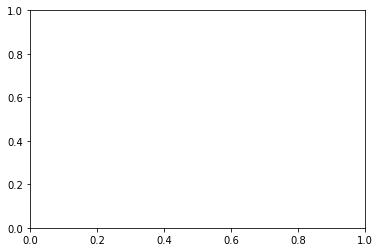

In [328]:
from sklearn.model_selection import learning_curve as LearningCurve
from sklearn.model_selection import StratifiedKFold

sizes = np.linspace(0.1, 1, 3)

scoring_method = "balanced_accuracy"

cv = StratifiedKFold(12)

fig, ax = plt.subplots(figsize=(6, 4))

lc_viz = LearningCurve(
    models['gbdt'],
    training_data,
    y_train,
    train_sizes=sizes,
    scoring=scoring_method,
    n_jobs=-1,
    error_score = 0,
    cv = cv
)



In [ ]:
lc_viz.fit(X, y)
lc_viz.poof()
fig.savefig("learning_curve.jpg")

In [ ]:
tmp = []

#print(n_y_test[13])
def check_same(arr1, arr2):
    same = True
    for item in arr1:
        if item not in arr2:
            return False
        
    for item in arr2:
        if item not in arr1:
            return False
    
    return True
    
print("predicted", "actual")
tmp = binarizer.inverse_transform(y_test)
tmp_prediction = to_only_none(predictions['gbdt'])
for i, item in enumerate(binarizer.inverse_transform(tmp_prediction)):
    if not check_same(tmp[i], item):
        print(item, "||", tmp[i])
    


# Cross Validation

In [86]:
from sklearn.model_selection import KFold
def process_out_noise(input):
    max_word_length = 18
    output = re.sub(r'\d+', '', input)
    w = re.findall(r'\w+', output)

    res = ""

    for word in w:
        if len(word) <= max_word_length:
            res += " " + word

    if output != '' and len(output) <= max_word_length:
        return output
    return res

model = GradientBoostingClassifier(learning_rate=0.775, max_depth=8, min_samples_split= 3, n_estimators=120)
vectoriser = CountVectorizer(min_df = 1, ngram_range=(1,3), max_df=1000, encoding='utf-8', analyzer='word')

kf = KFold(n_splits=10, shuffle=True, random_state=None)

split = 1
for train_index, test_index in kf.split(data):
    X_train, y_train = data['new_line'][train_index], data['label'][train_index]
    X_test, y_test = data['new_line'][test_index], data['label'][test_index]

    X_train = vectoriser.fit_transform(X_train)
    X_test = vectoriser.transform(X_test)

    model.fit(x, y)
    prev_score = model.score(x, y)

    prediction = model.predict(X_test)

    print("---- For split: {}".format(split))
    new_score = model.score(X_test, y_test)
    print('Accuracy score: ', str(accuracy_score(y_test, prediction)))
    print('Precision score: ', str(precision_score(y_test, prediction, average='weighted', zero_division=0)))
    print('Recall score: ', str(recall_score(y_test, prediction, average='weighted', zero_division=0)))
    print('F1 score: ', str(f1_score(y_test, prediction, average='weighted',  zero_division=0)))

    split += 1


NameError: name 'x' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i in range(len(y_test)):
    print(binarizer.inverse_transform(y_test)[i], end="||")
    print(binarizer.inverse_transform(prediction)[i])

In [ ]:
import joblib

m = joblib.load('../models/model_gbdt.pkl')

In [ ]:
c = joblib.load('../models/vectorizer.pkl')

In [ ]:
import pandas as pd
b = pd.read_csv('full13.csv')

In [ ]:
b = b[['new_line', 'language']]

In [ ]:
type(b)

In [ ]:
b

In [ ]:
bin = joblib.load('../models/binarizer.pkl')

In [ ]:
import scipy.sparse as sp

dataa = b.apply(lambda col: col.str.strip())
dataa= dataa.apply(lambda x: c.transform(x))
dataa = sp.hstack(dataa)
w = m.predict(dataa)


In [ ]:
item_to_predict = pd.DataFrame()
item_to_predict['new_line'] = [ 'Simple end list indicator for cases when we want to make sure the FAB doesnt cover any content.' ]
item_to_predict['language'] = ['python']


In [ ]:
predictee = item_to_predict.apply(lambda col: col.str.strip())
predictee = predictee.apply(lambda x: c.transform(x))
predictee = sp.hstack(predictee)


In [ ]:
for item in bin.inverse_transform(m.predict(predictee)):
    print(item)

In [ ]:
b.iloc[0]['original_comment']

In [ ]:
for item in bin.inverse_transform(m.predict(dataa)):
    print(item)

In [ ]:
dataa.shape

In [ ]:
testing_data.shape

In [ ]:
# Grid search cv

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

learning_rates = np.linspace(0.5, 1.5, 3)

gsc = GridSearchCV(
            estimator=GradientBoostingClassifier(),
            param_grid={#"learning_rate": learning_rates,
                        # "max_depth": [6, 8, 9, 10, 11],
                        "n_estimators": [80, 90, 100, 120],
                        "min_samples_split": [2, 3, 5, 7],
                       },
            cv=3, scoring='f1_weighted', verbose=0, n_jobs=-1)

grid_result = gsc.fit(training_data, y_train)

best_params = grid_result.best_params_  # for the first y_target estimator

print(best_params)


In [ ]:
`